# 💡 Introduction

Rainfall frequency analysis helps engineers and planners estimate how often specific rainfall events are likely to occur, such as a “10-year storm.” These statistics are essential for designing drainage infrastructure, managing flood risks, and sizing stormwater systems.

The SCS Curve Number (CN) method is a widely used empirical approach that estimates surface runoff from rainfall based on land use, soil type, and hydrologic conditions. When paired with frequency-based rainfall inputs from NOAA Atlas 14, it enables realistic modeling of watershed response across various return periods and storm durations.

This learning module is designed to reinforce your understanding of:
- How rainfall depth varies with return period across different durations
- The role of CN in shaping runoff response
- The interplay between frequency-based rainfall and runoff generation

Explore the questions and quiz below to apply these concepts and reflect on their real-world implications.
# 📊 NOAA Rainfall Frequency & SCS Runoff Estimation Tool

This script visualizes rainfall depth-frequency data from a NOAA Atlas 14 CSV file and estimates runoff using the SCS Curve Number method.

---

## 🔄 Key Features

- **Automatic CSV Processing:**
  - Loads NOAA rainfall frequency data (e.g., "All_Depth_English_PDS.csv")
  - Extracts durations and return periods (e.g., 2-year, 10-year storms)
  - Converts rainfall depths from inches to mm for SCS runoff estimation

- **📈 Rainfall Frequency Visualization:**
  - Static plot of rainfall depth vs. return period across multiple durations

- **🌧️ SCS Runoff Calculation:**
  - Implements standard SCS runoff formula:
    $$
    Q = \frac{(P - 0.2S)^2}{P + 0.8S},\quad \text{where } S = \frac{25400}{CN} - 254
    $$
  - Curve Number (CN) adjustable via slider (range: 30–100)

- **🧮 Interactive Analysis:**
  - Interactive plot comparing rainfall depth and resulting runoff for selected storm duration
  - Tabular output showing return period vs. rainfall and runoff

---

## 🧰 Applications

- Hydrologic modeling
- Stormwater system design
- Educational demonstrations of rainfall-runoff relationships
💡 Use cases include urban drainage design, floodplain analysis, and stormwater infrastructure planning.

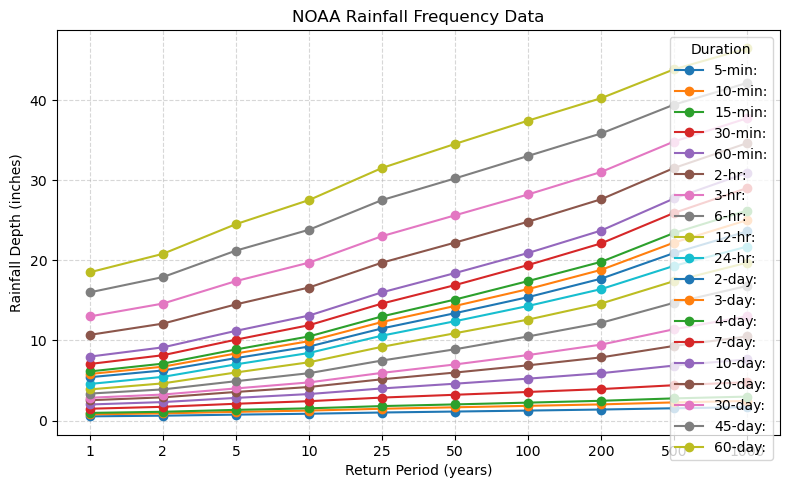

interactive(children=(IntSlider(value=75, description='Curve Number', min=30), Dropdown(description='duration'…

<function __main__.plot_runoff_vs_frequency(CN, duration)>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from IPython.display import display, Markdown

# --- Load NOAA CSV File ---
csv_file = "All_Depth_English_PDS.csv"  # Replace with your actual file path
df = pd.read_csv(csv_file)

# Ensure 'Duration' is present
if 'Duration' not in df.columns:
    raise ValueError("CSV does not contain a 'Duration' column.")

df.set_index('Duration', inplace=True)

# Filter numeric return period columns
valid_columns = [col for col in df.columns if any(char.isdigit() for char in col)]
df_filtered = df[valid_columns]

# Extract numeric return periods (e.g., "2-year" → 2)
def extract_return_period(label):
    try:
        return int(label.split('-')[0])
    except:
        return None

df_T = df_filtered.T
df_T.index = df_T.index.map(extract_return_period)
df_T = df_T.dropna().sort_index()
df_T.columns.name = None

# --- Static Plot: Rainfall Depth vs Return Period ---
plt.figure(figsize=(8, 5))
for duration in df_T.columns:
    plt.plot(df_T.index.astype(str), df_T[duration], marker='o', label=duration)

plt.xlabel("Return Period (years)")
plt.ylabel("Rainfall Depth (inches)")
plt.title("NOAA Rainfall Frequency Data")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Duration")
plt.tight_layout()
plt.show()

# --- SCS Runoff Function ---
def scs_runoff(P, CN):
    if CN <= 0 or CN > 100:
        return None
    S = (25400 / CN) - 254  # (mm)
    Ia = 0.2 * S
    if P <= Ia:
        return 0.0
    else:
        Q = ((P - Ia) ** 2) / (P - Ia + S)
        return round(Q, 2)

# --- Interactive Runoff Estimation ---
def plot_runoff_vs_frequency(CN, duration):
    if duration not in df_T.columns:
        print(f"❌ Duration '{duration}' not available.")
        return

    rainfall = df_T[duration] * 25.4  # inches → mm
    runoff = rainfall.apply(lambda P: scs_runoff(P, CN))

    plt.figure(figsize=(8, 5))
    plt.plot(rainfall.index, rainfall.values, label="Rainfall Depth (mm)", marker='o', color='dodgerblue')
    plt.plot(runoff.index, runoff.values, label="Runoff Depth (mm)", marker='s', color='orangered')
    plt.xlabel("Return Period (years)")
    plt.ylabel("Depth (mm)")
    plt.title(f"SCS Runoff Estimates for {duration} Storm\nCurve Number = {CN}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    display(Markdown(f"### 📊 Runoff Summary for {duration} (CN = {CN})"))
    display(pd.DataFrame({
        'Rainfall (mm)': rainfall.round(1),
        'Runoff (mm)': runoff
    }, index=rainfall.index))

# --- Launch Interactive Tool ---
available_durations = df_T.columns.tolist()

interact(
    plot_runoff_vs_frequency,
    CN=IntSlider(value=75, min=30, max=100, step=1, description="Curve Number"),
    duration=available_durations
)

# 🌧️ Rainfall Frequency & SCS Curve Number Runoff Estimation – Learning Module

This module complements your interactive Python tool by offering conceptual questions, reflective prompts, and a quiz to reinforce key hydrologic principles.

---

## 🧠 Conceptual Questions (with Hints)

1. **Why does rainfall depth increase with return period in NOAA frequency analysis?**  
   🔎 *Hint: Think about the statistical rarity of extreme storms.*

2. **In the SCS Curve Number method, what does the CN represent physically and how does it affect runoff sensitivity?**  
   🔎 *Hint: Higher CN reflects less infiltration and more imperviousness.*

3. **What is the significance of the initial abstraction \( I_a = 0.2S \)?**  
   🔎 *Hint: It accounts for losses before runoff begins, like infiltration and storage.*

4. **Why is rainfall converted from inches to millimeters before using the SCS equation?**  
   🔎 *Hint: Units must be consistent—especially with empirically derived constants.*

5. **What limitations arise when applying point-based frequency data to entire catchments?**  
   🔎 *Hint: Does one location's storm represent the whole watershed?*

---

## 🔍 Reflective Questions (with Hints)

1. **How would increasing urbanization in a watershed be reflected in the CN value?**  
   🔎 *Hint: Think about roads, rooftops, and reduced infiltration.*

2. **If climate change increases short-duration rainfall intensity, how would that affect runoff estimates?**  
   🔎 *Hint: Runoff rises faster with higher rainfall, especially in urbanized areas.*

3. **When should longer-duration storms (e.g. 24-hour) be used for design instead of shorter ones?**  
   🔎 *Hint: Consider detention basin sizing vs. flash flood mitigation.*

4. **What practical issues arise when applying SCS CN methods to large, mixed-use rural basins?**  
   🔎 *Hint: Spatial variability of soil and land cover can complicate things.*

5. **How might a hydrologist validate SCS runoff estimates against real-world observations?**  
   🔎 *Hint: Look for monitoring stations, historical flood records, or storm event calibration.*

---

## ✅ Quiz Questions

**Q1.** Which of the following best describes a 25-year storm?  
A. It rains for 25 hours  
B. It occurs every 25 years exactly  
C. It has a 4% chance of occurring in any given year  
D. It always causes flooding  
🟢 **Correct Answer:** C

---

**Q2.** The term \( S \) in the SCS method stands for:  
A. Slope  
B. Storage capacity after initial abstraction  
C. Storm intensity  
D. Sediment transport  
🟢 **Correct Answer:** B

---

**Q3.** If the Curve Number increases, what happens to the estimated runoff (assuming constant rainfall)?  
A. It decreases  
B. It stays the same  
C. It increases  
D. It resets to zero  
🟢 **Correct Answer:** C

---

**Q4.** The rainfall input in this tool is converted from:  
A. mm to gallons  
B. m³ to inches  
C. inches to millimeters  
D. feet to liters  
🟢 **Correct Answer:** C

---

**Q5.** If precipitation is less than the initial abstraction, runoff will be:  
A. Underestimated  
B. Negative  
C. Equal to precipitation  
D. Zero  
🟢 **Correct Answer:** D